## Assign Modularity

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

### Load Username

In [2]:
df = pd.read_csv(os.path.join(os.pardir,os.pardir,"data","01_out","pemilu-at-kpu_id.csv"), usecols = ['text','username'])

In [3]:
def unique_username(dataframe):
    dataframe = dataframe.str.lower()
    dataframe = dataframe.drop_duplicates()
    return dataframe.tolist()

unique_list = unique_username(df['username'])

### Replace id to username and Load Gephi Modularity

In [4]:
modularity_df = pd.read_csv(os.path.join(os.pardir,os.pardir,"data","gephi","50-KCore_modularity.csv"))

In [5]:
unique_id = list(map(str, range(0,len(unique_list))))

In [6]:
modularity_df['Id'] = modularity_df['Id'].str.lstrip("'")
modularity_df['id'] = modularity_df['Id']
modularity_df['Id'] = modularity_df['Id'].replace(unique_id,unique_list)
modularity_df.rename(columns={"Id":"username"}, inplace=True)

In [7]:
username_list = modularity_df['username'].tolist()
modularity_list = modularity_df['modularity_class'].tolist()
id_list = modularity_df['id'].tolist()

## Remove Tweet outside community

In [8]:
removed_uninedexed = df
removed_uninedexed['username'] = removed_uninedexed['username'].str.lower()

In [9]:
removed_unindexed = df[df['username'].isin(username_list)]
removed_indexed = removed_unindexed.reset_index(drop=True)

## Add modularity column

In [11]:
removed_indexed['modularity'] = removed_indexed['username']
removed_indexed['node_id'] = removed_indexed['username']

In [12]:
removed_indexed['modularity'] = removed_indexed['modularity'].replace(username_list, modularity_list)
removed_indexed['node_id'] = removed_indexed['node_id'].replace(username_list, id_list)

In [13]:
removed_indexed.count()

text          14548
username      14548
modularity    14548
node_id       14548
dtype: int64

In [14]:
# Export to csv
removed_indexed.to_csv(os.path.join(os.pardir,os.pardir,"data","04_out","50-KCore-tweet.csv"), index=False)

## In Degree Distribution

In [15]:
df = pd.read_csv(os.path.join(os.pardir,os.pardir,"data/gephi/InDegreeDistribution.csv"))

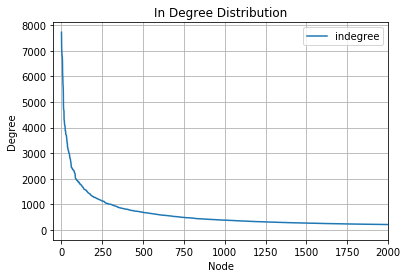

In [16]:
# df.head()
plot = df.plot(xlim=(-50,2000),
                grid=True,
                title="In Degree Distribution")
plot.set_xlabel("Node")
plot.set_ylabel("Degree")
plt.show()
# plt.savefig(os.path.join(os.pardir,os.pardir,"data/04_out/longtail"),dpi=300)